# question 1

In [11]:
%matplotlib inline
import sys
import networkx as nx
import random
import matplotlib.pyplot as plt

def getErdosReniModel(n, p):
    """
    Gets n - number of nodes and p - probability of an edge and returns random graph
    implementation of an Erdos–Rényi model. 
    """
    nodesList = [x for x in range(0,n)] 
    G=nx.Graph()

    for n1 in nodesList:
        G.add_node(n1)
        for n2 in nodesList:
            if n1 > n2:
                prob = random.uniform(0, 1)
                if prob <= p:
                    G.add_edge(n1, n2)
                
    return G

# for testing
#G = getErdosReniModel(10, 0.5)
#nx.draw(G, with_labels = True, node_size=2000)
#plt.show()

# for i in range(0,10):
#     print(G.degree(i))

In [12]:
%matplotlib inline
import sys
import networkx as nx
import random
import matplotlib.pyplot as plt

def getSmallWorldModel(n, k, p):
    """
    Gets n - number of nodes, k - the average degree and p - probability of an edge
    and returns random graph implementation of an Erdos–Rényi model. 
    """
    r = range(0, n)
    G=nx.Graph()
    G.add_nodes_from(r)

    for i in r:
        for j in r:
            if i == j:
                continue
            res = abs(i - j) % (n - (k/2))
            if 0 <= res and res <= k/2:
                G.add_edge(i, j)
        
    remove = []
    for e in G.edges():
        prob = random.uniform(0, 1)
        if prob > p:
            remove.append((e[0],e[1]))
    G.remove_edges_from(remove)

    return G

# for testing
#G = getSmallWorldModel(10, 4, 0.5)
#nx.draw(G, with_labels = True, node_size=2000)
#plt.show()


In [13]:
def getAllPairs(list):
    result = []
    for p1 in range(len(list)):
            for p2 in range(p1+1,len(list)):
                    result.append([list[p1],list[p2]])
    return result
    
def nodeClusteringCoef(G, u):
    neighbors = G.neighbors(u)
#    print("neighbors of {}: {}".format(u, neighbors))
    k = len(neighbors)
    if k < 2:
        return 0

    exist = 0
    for v, w in getAllPairs(neighbors):
        if G.has_edge(v, w):
            exist += 1

    possible = k * (k-1) / 2
    return (exist / float(possible))    



def graphClusteringCoef(G):
    ccList = []
    for node in G:
#        print("{}".format(node))
        ccList.append(nodeClusteringCoef(G, node))
    return sum(ccList)/len(G)


def diameter(G):
    visited = []
    max_sp = 0
    for n1 in G.nodes():
        if n1 not in visited:
            visited.append(n1)
            sp = list(nx.shortest_path_length(G,n1).values())
            temp_max = max(sp)
            if temp_max > max_sp:
                max_sp = temp_max
    return max_sp



In [24]:
def getDegreeDistDict(G):
    degree_dist = {}
    for node in G.nodes():
        node_degree = len(G[node])
        if node_degree not in degree_dist:
            degree_dist[node_degree] = 0
        degree_dist[node_degree] += 1
    return degree_dist

# -------- erdos reni model -------- 
ER_Graph = getErdosReniModel(10000, 0.2)
ergDegDist = getDegreeDistDict(ER_Graph)
#print("done")

# -------- small world model -------- 
SW_Graph = getSmallWorldModel(10000, 8, 0.1)
swgDegDist = getDegreeDistDict(SW_Graph)
#print("done")



----- Erdos Reni graph: -----


<IPython.core.display.Javascript object>


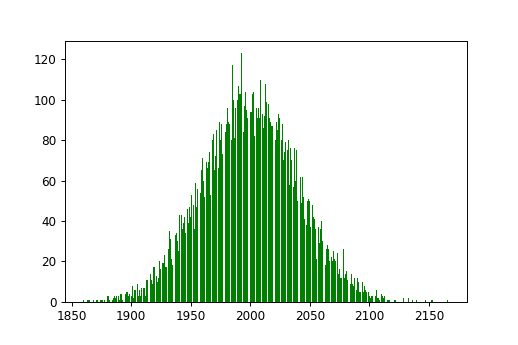

In [25]:
%matplotlib notebook
print("----- Erdos Reni graph: -----")
#nx.draw(ER_Graph, with_labels = True, node_size=2000)
#plt.show()
plt.bar(list(ergDegDist.keys()), list(ergDegDist.values()), color='g')
plt.show()

In [22]:
ergClustCoef = graphClusteringCoef(ER_Graph)
print("clustering coefficient: {}".format(ergClustCoef))


clustering coefficient: 0.199208772247


In [23]:
ergDiameter = diameter(ER_Graph)
#ergDiameter = nx.algorithms.distance_measures.diameter(ER_Graph)
print("diameter: {}".format(ergDiameter))


diameter: 2


----- Watts Strogatz graph: -----


<IPython.core.display.Javascript object>


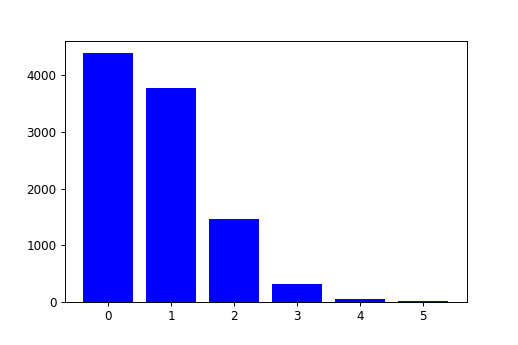

In [7]:
%matplotlib notebook
print("----- Watts Strogatz graph: -----")
plt.bar(list(swgDegDist.keys()), list(swgDegDist.values()), color='b')
plt.show()
#nx.draw(SW_Graph, with_labels = True, node_size=2000)
#plt.show()


In [8]:
swgClustCoef = graphClusteringCoef(SW_Graph)
print("clustering coefficient: {}".format(swgClustCoef))

swgDiameter = diameter(SW_Graph)
print("diameter: {}".format(swgDiameter))



clustering coefficient: 0.00972
diameter: 10


# question 2

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx

def degreeCentrality(G):
    degreeDict = {}
    for n in G:
        degreeDict[n] = G.degree(n)
    return degreeDict

def closenessCentrality(G):
    closenessDict = {}
    for node in G.nodes():
        s = 0
        shortDistFromNodeDict = nx.shortest_path_length(G, source=node)
        shortDistList = shortDistFromNodeDict.values();
        for elem in shortDistList:
            s += elem
        closenessDict[node] = (1.0 / s)
    return closenessDict

def betweennessCentrality(G):
    visited=[]
    sp = {}
    
    # initialization to 0
    for node in G.nodes():
        sp[node] = 0
        
    for n1 in G.nodes():
        if (n1 not in visited):
            visited.append(n1) 
            for n2 in G.nodes():
                if n2 not in visited:
                    paths = list(nx.all_shortest_paths(G, n1, n2)) #find all paths from n1 to n2
                    for node in G.nodes():
                        if node != n1 and node != n2: #calculate centrality for the nodes in shortest path
                            for path in paths:
                                if node in path:
                                    sp[node] += 1.0/len(paths)
    return sp


# for testing
# -------- erdos reni model -------- 
#N = 20
#ER_Graph = getErdosReniModel(N, 0.3)

#nxCent = nx.degree_centrality(ER_Graph)
#myCent = degreeCentrality(ER_Graph)
#for n in range(0, N):
#    print("{} - {}".format( (N-1)*nxCent[n], myCent[n]))

#nxCloseCent = nx.closeness_centrality(ER_Graph)
#myCloseCent = closenessCentrality(ER_Graph)
#for n in range(0, N):
#    print("{} - {}".format( nxCloseCent[n]/float(N-1), myCloseCent[n]))

#nxBetweenCent = nx.betweenness_centrality(ER_Graph)
#myBetweenCent = betweennessCentrality(ER_Graph)
#for n in range(0, N):
#    print("{} - {}".format( nxBetweenCent[n]*(N-1)*(N-2)*0.5, myBetweenCent[n]))


In [10]:
%matplotlib notebook

famGraph = nx.florentine_families_graph()

#nx.draw_networkx(famGraph, with_labels = True, node_size=2000)
#plt.show()

# degree centrality
degCent = degreeCentrality(famGraph)
degCentTuplesList = [ (f, degCent[f]) for f in degCent.keys()]
degCentTop5 = sorted(degCentTuplesList, key=lambda tup: tup[1], reverse=True)[:5]

print("degree centrality top 5:")
print(degCentTop5)
print("")


# closeness centrality
closeCent = closenessCentrality(famGraph)
closeCentTuplesList = [ (f, closeCent[f]) for f in closeCent.keys()]
closeCentTop5 = sorted(closeCentTuplesList, key=lambda tup: tup[1], reverse=True)[:5]

print("closeness centrality top 5:")
print(closeCentTop5)
print("")


# betweenness centrality
betweenCent = betweennessCentrality(famGraph)
betweenCentTuplesList = [ (f, betweenCent[f]) for f in betweenCent.keys()]
betweenCentTop5 = sorted(betweenCentTuplesList, key=lambda tup: tup[1], reverse=True)[:5]

print("betweenness centrality top 5:")
print(betweenCentTop5)
print("")



degree centrality top 5:
[('Medici', 6), ('Strozzi', 4), ('Guadagni', 4), ('Tornabuoni', 3), ('Albizzi', 3)]

closeness centrality top 5:
[('Medici', 0.04), ('Ridolfi', 0.03571428571428571), ('Tornabuoni', 0.034482758620689655), ('Albizzi', 0.034482758620689655), ('Guadagni', 0.03333333333333333)]

betweenness centrality top 5:
[('Medici', 47.5), ('Guadagni', 23.16666666666667), ('Albizzi', 19.333333333333336), ('Salviati', 13.0), ('Ridolfi', 10.333333333333334)]



<IPython.core.display.Javascript object>


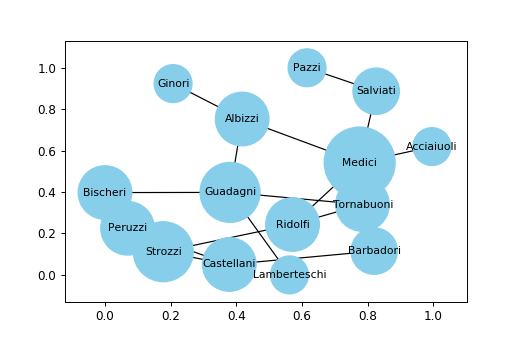

/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


<IPython.core.display.Javascript object>


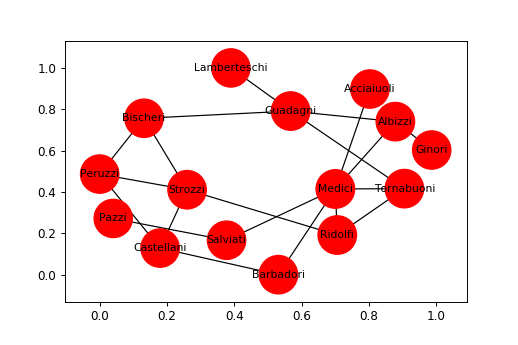

<IPython.core.display.Javascript object>


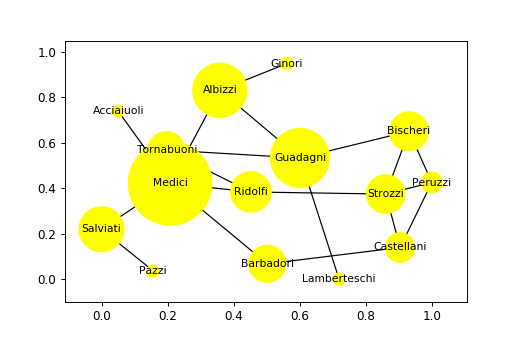

In [11]:
%matplotlib notebook

# degree centrality
degCentNodeSizes = [(degCent[node]+1) * 500 for node in famGraph.nodes()]
plt.figure(1)
nx.draw_networkx(famGraph, with_labels=True, node_color="skyblue", font_size=9, node_size=degCentNodeSizes)

# closeness centrality
closeCentNodeSizes = [(closeCent[node]+1) * 1000 for node in famGraph.nodes()]
plt.figure(2)
nx.draw_networkx(famGraph, with_labels=True, node_color="red", font_size=9, node_size=closeCentNodeSizes)

# betweenness centrality
betweenCentNodeSizes = [(betweenCent[node]+1) * 100 for node in famGraph.nodes()]
plt.figure(3)
nx.draw_networkx(famGraph, with_labels=True, node_color="yellow", font_size=9, node_size=betweenCentNodeSizes)



# question 3

1. Is graph 1 (p+ = 0.9) balanced: False


<IPython.core.display.Javascript object>


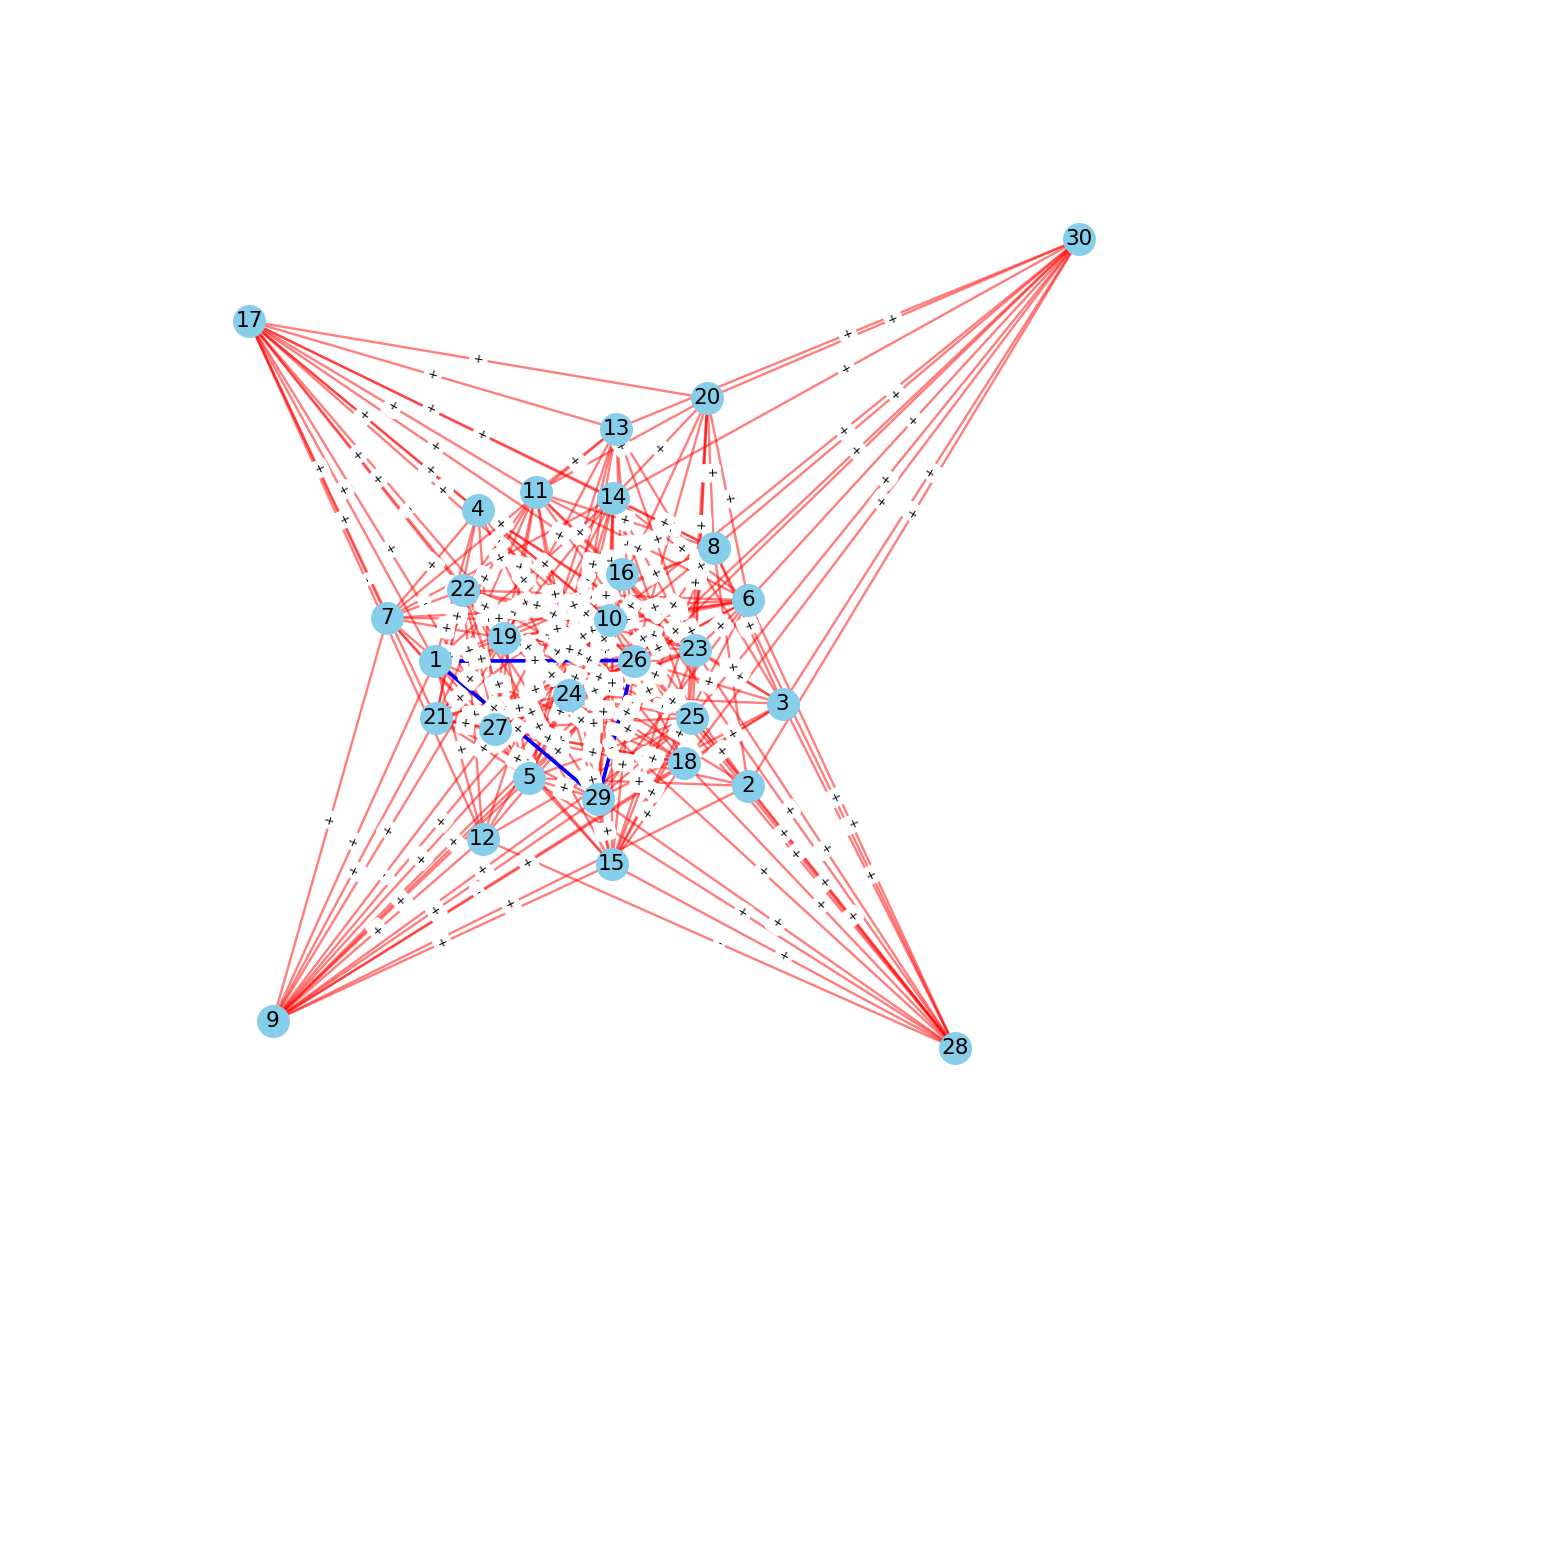

2. Is graph 2 (p+ = 0.5) balanced: False


<IPython.core.display.Javascript object>


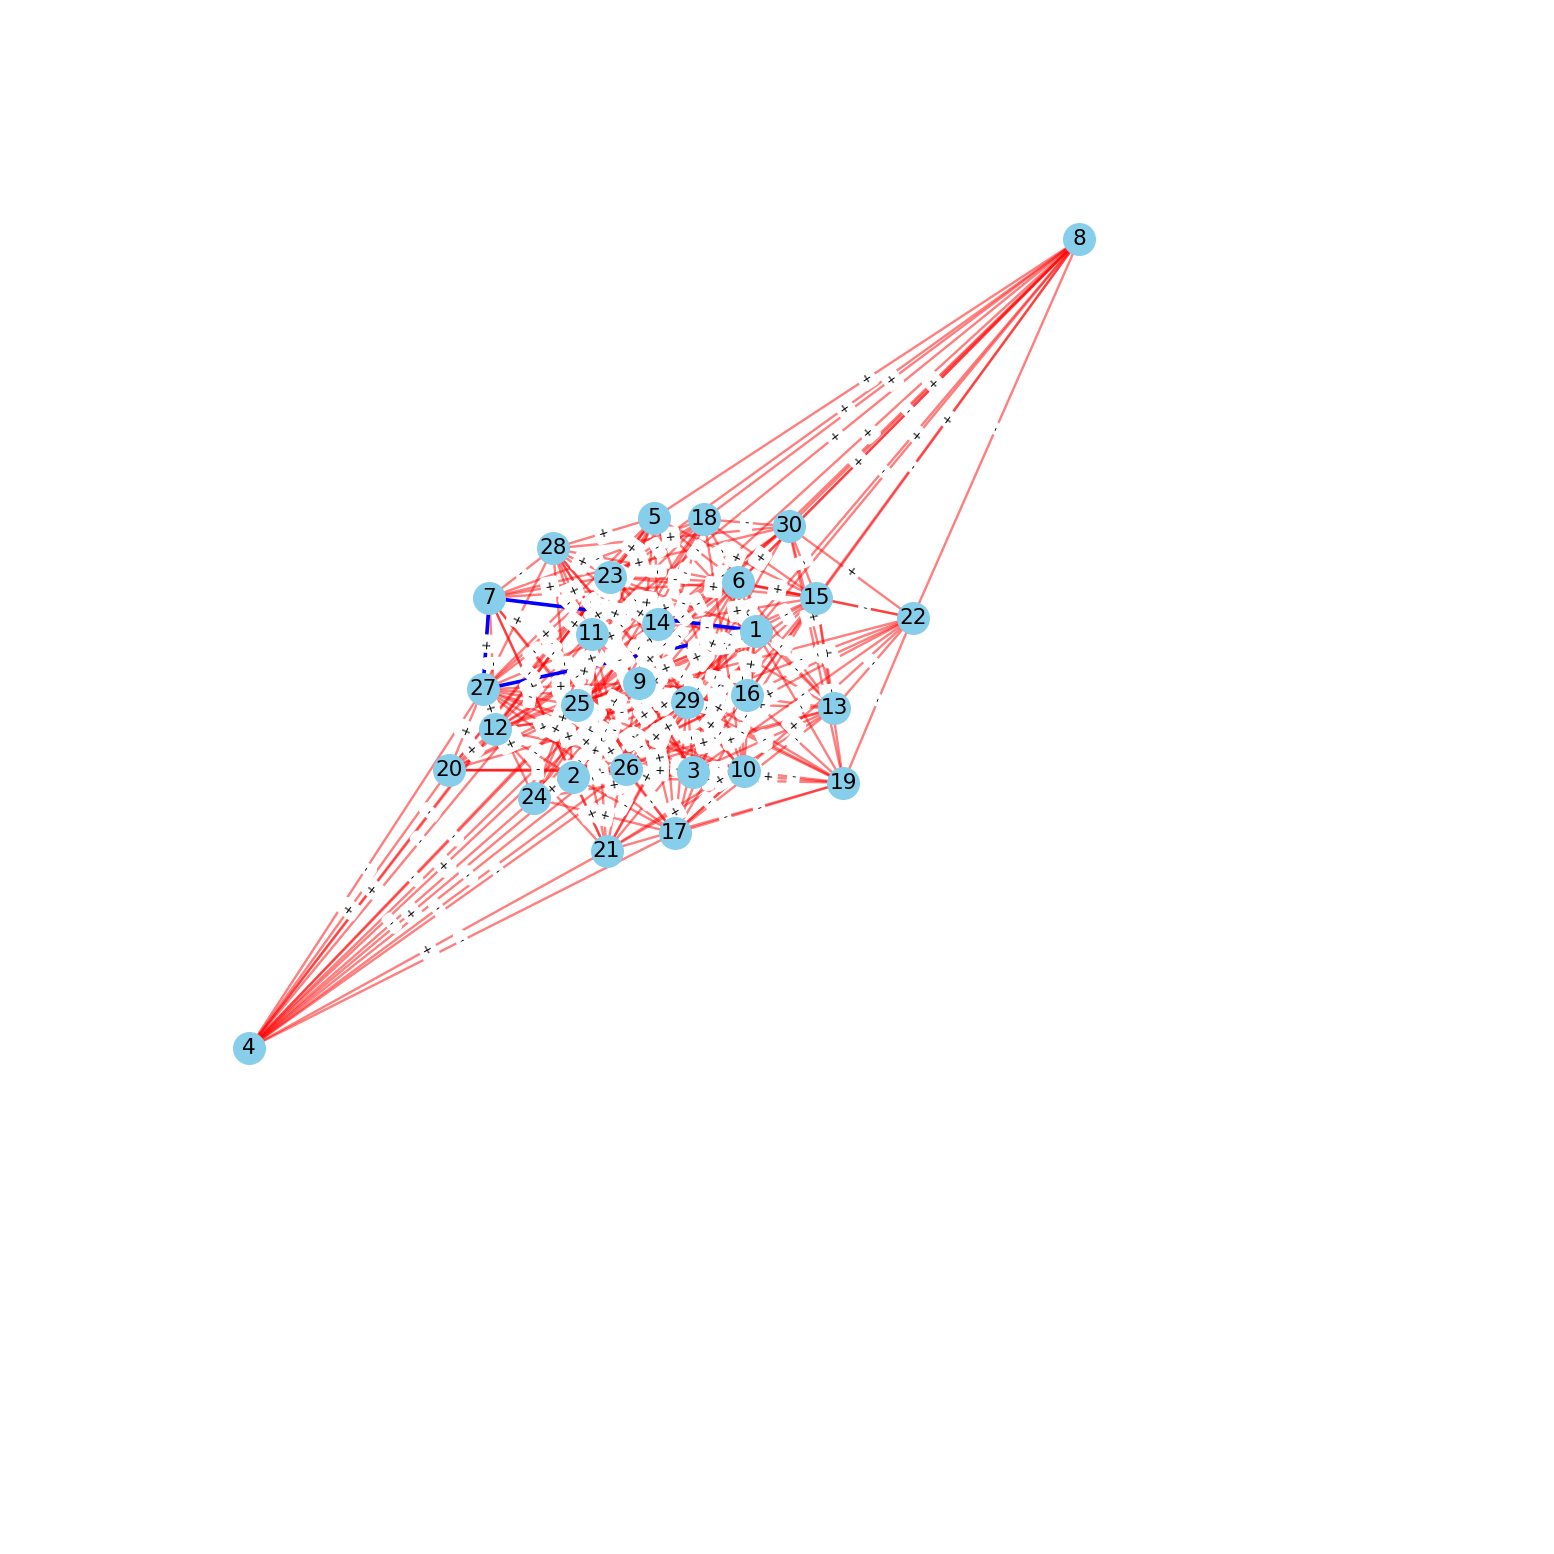

In [31]:
%matplotlib notebook

import matplotlib.pyplot as plt
import networkx as nx
import random


def check_balance(G):
    """
    is the given graph balanced i.e doesn't contain odd cycle
    """
    isContainOddCycle = getOddCycle(G)
    return (isContainOddCycle == None)

def getOddCycle(G):
    """
    return the odd cycle's edges if exist in the graph. Otherwise, return None
    """
    for c in nx.cycle_basis(G):
        cycle = G.subgraph(c)
        cycleNegativeEdges = [(u,v) for (u,v,d) in cycle.edges(data = True) if d['label'] == '-']
        
        if len(cycleNegativeEdges) % 2 == 1:
            return cycle.edges()

    return None

def getErdoRenyiPosNeg(n, edgeProb, posProb):
    G = nx.Graph()
    for i in range(1, n+1):
        G.add_node(i)
        for j in range(i+1, n+1):
            p = random.uniform(0, 1)
            if p < edgeProb:
                G.add_edge(i,j)

                posNegProb = random.uniform(0,1)
                if posNegProb < posProb:
                    G.add_edge(i, j, label='+')
                else:
                    G.add_edge(i, j, label='-')
                    
    return G


# ------------ Graph 1 ------------
G1 = getErdoRenyiPosNeg(30, 0.5, 0.9)
G1_isBal = check_balance(G1)
print("1. Is graph 1 (p+ = 0.9) balanced: {}".format(G1_isBal))

pos=nx.spring_layout(G1)
# Draw nodes
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G1, pos, node_size=700, node_color='skyblue')
# Draw edges
nx.draw_networkx_edges(G1, pos, width=2, alpha=0.5, edge_color='red', arrows=False)
if not G1_isBal:
    oddCycleEdges = getOddCycle(G1)
    nx.draw_networkx_edges(G1, pos, edgelist=oddCycleEdges, width=3, alpha=1, edge_color='blue')
# Draw node labels
nx.draw_networkx_labels(G1, pos, font_size=18, font_family='sans-serif')
# Draw edge labels
edge_labels =dict([((u, v), d['label']) for u, v, d in G1.edges(data=True)])
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()



# ------------ Graph 2 ------------
G2 = getErdoRenyiPosNeg(30, 0.5, 0.5)
G2_isBal = check_balance(G2)
print("2. Is graph 2 (p+ = 0.5) balanced: {}".format(G2_isBal))

pos=nx.spring_layout(G2)
# Draw nodes
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G2, pos, node_size=700, node_color='skyblue')
# Draw edges
nx.draw_networkx_edges(G2, pos, width=2, alpha=0.5, edge_color='red', arrows=False)
if not G2_isBal:
    oddCycleEdges = getOddCycle(G2)
    nx.draw_networkx_edges(G2, pos, edgelist=oddCycleEdges, width=3, alpha=1, edge_color='blue')
# Draw node labels
nx.draw_networkx_labels(G2, pos, font_size=18, font_family='sans-serif')
# Draw edge labels
edge_labels =dict([((u, v), d['label']) for u, v, d in G2.edges(data=True)])
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show() 




